## Orbital Mechanics 
### Shreya Chowdhary - Studio 1

In [1]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim.py module
from modsim import *

In [2]:
m = UNITS.meter
s = UNITS.second
kg = UNITS.kilogram
N = UNITS.newton

<Unit('newton')>

In [15]:
# Important constants 
G = 6.67408e-11 * N/(kg**2 * m**2)
E_mass = 5.972e24 * kg
S_mass = 1.989e30 * kg

# Initial state
init = State(x = 0 * m, y = 149.6e9 * m, 
                 v_x = 30330 * m/s, v_y = 0 * m/s)

def make_system(G, E_mass, S_mass, init):
    system = System(init = init, 
                   G = G, 
                   mE = E_mass,
                   mS = S_mass, 
                   r_final = 7018979000*m, 
                   t_0 = 0 * s, 
                   t_end = 34e6 * s)
    return system

In [17]:
system = make_system(G, E_mass, S_mass, init)

,values
init,x 0 meter y 1496000...
G,6.67408e-11 newton / kilogram ** 2 / meter ** 2
mE,5.972e+24 kilogram
mS,1.989e+30 kilogram
r_final,7018979000 meter
t_0,0 second
t_end,34000000.0 second


In [18]:
def grav_force(state, system):
    unpack(system)
    x, y, v_x, v_y = state
    position = Vector(x, y)
    
    # Use Newton's Law of Universal Gravitation 
    # to calculate the magnitude of the force
    F_magnitude = ((G*mE*mS)/(position.mag**2))/mE
    
    # Create the vector for force
    # in the opposite direction as the position vector
    Fx, Fy = pol2cart(position.angle, F_magnitude)
    F = Vector(Fx*(-1), Fy*(-1))
    
    return F

In [20]:
# Testing grav_force func 
grav = grav_force(init, system)

<Quantity([-3.63198344e-19 -5.93147910e-03], 'newton / kilogram / meter ** 4')>

In [21]:
def event_func(state, t, system):
    ''' 
    Informs us when the Earth has completed its orbit around the Sun
    '''
    x, y, v_x, v_y = state
    position = Vector(x, y)
    return position.mag - system.r_final

In [22]:
def slope_func(state, t, system):
    '''
    Calculates the change in position and velocity
    '''
    unpack(system)
    x, y, v_x, v_y = state 
    grav = grav_force(state, system)
    
    Fx = grav.x 
    Fy = grav.y 
    
    dxdt = v_x
    dydt = v_y
    dv_xdt = Fx
    dv_ydt = Fy
    
    return dxdt, dydt, dv_xdt, dv_ydt

In [27]:
# Testing the slope function
slope_func(init, 0, system)

(<Quantity(30330.0, 'meter / second')>,
 <Quantity(0.0, 'meter / second')>,
 <Quantity(-3.6319834444224144e-19, 'newton / kilogram / meter ** 4')>,
 <Quantity(-0.00593147909577054, 'newton / kilogram / meter ** 4')>)

In [28]:
results, details = run_ode_solver(system, slope_func, events=event_func, method="RK23")

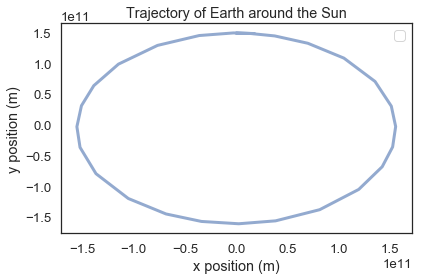

In [29]:
plot(results.x, results.y)
decorate(title="Trajectory of Earth around the Sun", 
        xlabel="x position (m)", 
        ylabel="y position (m)")